In [1]:

import numpy as np
np.random.seed(999999)
p0 = np.random.random()
target_distr = {0: p0, 1: 1 - p0}


In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
def get_var_form(params):
    qr = QuantumRegister(1, name = "q")
    cr = ClassicalRegister(1, name = "c")
    qc = QuantumCircuit(qr, cr)
    qc.u(params[0], params[1], params[2], qr[0])
    qc.measure(qr, cr[0])
    return qc



In [3]:
from qiskit import Aer
backend = Aer.get_backend("aer_simulator")

def counts_to_distr(counts):
    n_shots = sum(counts.values())
    return {int(k,2): v/n_shots for k, v in counts.items()}

def objective_function(params):
    qc = get_var_form(params)
    result = backend.run(qc).result()
    output_distr = counts_to_distr(result.get_counts())
    cost = sum(
        abs(target_distr.get(i,0) - output_distr.get(i,0))
        for i in range(2 ** qc.num_qubits)
    )
    return cost


In [4]:
from qiskit.algorithms.optimizers import COBYLA
optimizer = COBYLA(maxiter = 500, tol = 0.0001)

params = np.random.rand(3)
result = optimizer.minimize(
    fun = objective_function, x0 = params)
qc = get_var_form(result.x)
counts = backend.run(qc, shtos = 10000).result().get_counts()
output_distr = counts_to_distr(counts)

print("Paramaters Found: ", result.x)
print("Target Dist: ", target_distr)
print("Obtained Dist: ", output_distr)
print("Cost: ", objective_function(result.x))

Paramaters Found:  [2.03329615 1.58268368 1.52618777]
Target Dist:  {0: 0.308979188922057, 1: 0.691020811077943}
Obtained Dist:  {1: 0.7001953125, 0: 0.2998046875}
Cost:  0.086708377844114


In [5]:
from qiskit.circuit.library import EfficientSU2
entanglements = ["linear", "full"]
for entanglement in entanglements:
    form = EfficientSU2(num_qubits=4, entanglement = entanglement)
    print(f"{entanglement} entanglement:")
    display(form.decompose().draw(fold =-1))


linear entanglement:


┌──────────┐┌──────────┐     ┌──────────┐┌───────────┐                          ┌───────────┐┌───────────┐                          ┌───────────┐┌───────────┐                          
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├──■──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├───────────────────■──────┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├───────────────────■──────┤ Ry(θ[24]) ├┤ Rz(θ[28]) ├──────────────────────────
     ├──────────┤├──────────┤┌─┴─┐└──────────┘└┬──────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐             
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├┤ X ├─────■───────┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├────┤ X ├──────────■──────┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├────┤ X ├──────────■──────┤ Ry(θ[25]) ├┤ Rz(θ[29]) ├─────────────
     ├──────────┤├──────────┤└───┘   ┌─┴─┐     └──────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───┴───┴───┐    ┌─┴─┐    └───────────┘├───────────┤┌───────────┐
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├────────┤ X ├──────────■──────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├────┤ X ├──────────■──────┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├────┤ X ├──────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[30]) ├
     ├──────────┤├──────────┤        └───┘        ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    ├───────────┤├───────────┤    └───┘        ┌─┴─┐    ├───────────┤├───────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├─────────────────────┤ X ├────┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├─────────────────┤ X ├────┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├─────────────────┤ X ├────┤ Ry(θ[27]) ├┤ Rz(θ[31]) ├
     └──────────┘└──────────┘                     └───┘    └───────────┘└───────────┘                 └───┘    └───────────┘└───────────┘                 └───┘    └───────────┘└───────────┘

full entanglement:


┌──────────┐┌──────────┐                    ┌──────────┐┌───────────┐                                         ┌───────────┐┌───────────┐                                         ┌───────────┐┌───────────┐                          
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[4]) ├──■────■─────────■──┤ Ry(θ[8]) ├┤ Rz(θ[12]) ├───────────────────■────────■─────────■──┤ Ry(θ[16]) ├┤ Rz(θ[20]) ├───────────────────■────────■─────────■──┤ Ry(θ[24]) ├┤ Rz(θ[28]) ├──────────────────────────
     ├──────────┤├──────────┤┌─┴─┐  │         │  └──────────┘└┬──────────┤┌───────────┐    ┌─┴─┐      │         │  └───────────┘├───────────┤┌───────────┐    ┌─┴─┐      │         │  └───────────┘├───────────┤┌───────────┐             
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[5]) ├┤ X ├──┼────■────┼───────■───────┤ Ry(θ[9]) ├┤ Rz(θ[13]) ├────┤ X ├──────┼────■────┼────────■──────┤ Ry(θ[17]) ├┤ Rz(θ[21]) ├────┤ X ├──────┼────■────┼────────■──────┤ Ry(θ[25]) ├┤ Rz(θ[29]) ├─────────────
     ├──────────┤├──────────┤└───┘┌─┴─┐┌─┴─┐  │       │       └──────────┘├───────────┤┌───┴───┴───┐┌─┴─┐┌─┴─┐  │        │      └───────────┘├───────────┤┌───┴───┴───┐┌─┴─┐┌─┴─┐  │        │      └───────────┘├───────────┤┌───────────┐
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[6]) ├─────┤ X ├┤ X ├──┼───────┼────────────■──────┤ Ry(θ[10]) ├┤ Rz(θ[14]) ├┤ X ├┤ X ├──┼────────┼────────────■──────┤ Ry(θ[18]) ├┤ Rz(θ[22]) ├┤ X ├┤ X ├──┼────────┼────────────■──────┤ Ry(θ[26]) ├┤ Rz(θ[30]) ├
     ├──────────┤├──────────┤     └───┘└───┘┌─┴─┐   ┌─┴─┐        ┌─┴─┐    ├───────────┤├───────────┤└───┘└───┘┌─┴─┐    ┌─┴─┐        ┌─┴─┐    ├───────────┤├───────────┤└───┘└───┘┌─┴─┐    ┌─┴─┐        ┌─┴─┐    ├───────────┤├───────────┤
q_3: ┤ Ry(θ[3]) ├┤ Rz(θ[7]) ├───────────────┤ X ├───┤ X ├────────┤ X ├────┤ Ry(θ[11]) ├┤ Rz(θ[15]) ├──────────┤ X ├────┤ X ├────────┤ X ├────┤ Ry(θ[19]) ├┤ Rz(θ[23]) ├──────────┤ X ├────┤ X ├────────┤ X ├────┤ Ry(θ[27]) ├┤ Rz(θ[31]) ├
     └──────────┘└──────────┘               └───┘   └───┘        └───┘    └───────────┘└───────────┘          └───┘    └───┘        └───┘    └───────────┘└───────────┘          └───┘    └───┘        └───┘    └───────────┘└───────────┘

In [6]:
from qiskit.algorithms import VQE
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.algorithms import (GroundStateEigensolver,
                                      NumPyMinimumEigensolverFactory)
from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureMoleculeDriver, ElectronicStructureDriverType)
from qiskit_nature.transformers.second_quantization.electronic import FreezeCoreTransformer
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.mappers.second_quantization import ParityMapper
# pylint: enable=line-too-long

import matplotlib.pyplot as plt
import numpy as np
from qiskit_nature.circuit.library import UCCSD, HartreeFock
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit.opflow import TwoQubitReduction
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance
from qiskit.utils.mitigation import CompleteMeasFitter
#from qiskit.providers.aer.noise import NoiseModel

C:\Users\abira\AppData\Local\Temp\ipykernel_13788\2509705941.py:3: NatureDeprecationWarning: The qiskit_nature.algorithms.excited_state_solvers package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.algorithms.excited_state_solvers package.
  from qiskit_nature.algorithms import (GroundStateEigensolver,
C:\Users\abira\AppData\Local\Temp\ipykernel_13788\2509705941.py:3: NatureDeprecationWarning: The qiskit_nature.algorithms.pes_sampler package is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release . Please refer to 'https://github.com/Qiskit/qiskit-nature/issues/750' for additional information regarding 'extrapolators'.
  from qiskit_nature.algorithms import (GroundStateEigensolver,


In [7]:
def get_qubit_op(dist):
    molecule = Molecule(
        geometry=[
        ["Li", [0.0,0.0,0.0]],
        ["H", [dist,0.0,0.0]]
        ],
        multiplicity = 1,
        charge = 0,
    )
    driver = ElectronicStructureMoleculeDriver(molecule = molecule, basis = "sto3g",
    driver_type =ElectronicStructureDriverType.PYSCF)

    properties = driver.run()
    num_particles = (properties
                        .get_property("ParticleNumber")
                        .num_particles)
    num_spin_orbitals = int(properties 
                                .get_property("ParticleNumber")
                                .num_spin_orbitals)
    problem = ElectronicStructureProblem(
        driver,
        [FreezeCoreTransformer(freeze_core=True, remove_orbitals=[-3,-2])])

    second_q_ops = problem.second_q_ops()
    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()
    hamiltonian = second_q_ops[0]
    converter = QubitConverter(mapper, two_qubit_reduction = True)
    reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian)
    qubit_op = reducer.convert(qubit_op)

    return qubit_op, num_particles, num_spin_orbitals, problem, converter 
    

In [8]:
def exact_solver(problem, converter):
    solver = NumPyMinimumEigensolverFactory()
    calc = GroundStateEigensolver(converter, solver)
    result = calc.solve(problem)
    return result

backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 4.0, 0.2)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=5)

# pylint: disable=undefined-loop-variable
for dist in distances:
    (qubit_op, num_particles, num_spin_orbitals,
                             problem, converter) = get_qubit_op(dist)
    result = exact_solver(problem,converter)
    exact_energies.append(result.total_energies[0].real)
    init_state = HartreeFock(num_spin_orbitals, num_particles, converter)
    var_form = UCCSD(converter,
                     num_particles,
                     num_spin_orbitals,
                     initial_state=init_state)
    vqe = VQE(var_form, optimizer, quantum_instance=backend)
    vqe_calc = vqe.compute_minimum_eigenvalue(qubit_op)
    vqe_result = problem.interpret(vqe_calc).total_energies[0].real
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_result:.5f}",
          f"Exact Energy: {exact_energies[-1]:.5f}")

print("All energies have been calculated")

C:\Users\abira\AppData\Local\Temp\ipykernel_13788\983490126.py:16: NatureDeprecationWarning: The qiskit_nature.drivers.Molecule class is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the qiskit_nature.second_q.drivers.Molecule class.
  problem, converter) = get_qubit_op(dist)


MissingOptionalLibraryError: "The 'pyscf' library is required to use 'PySCFDriver'.  See https://pyscf.org/install.html."

ValueError: x and y must have same first dimension, but have shapes (18,) and (0,)

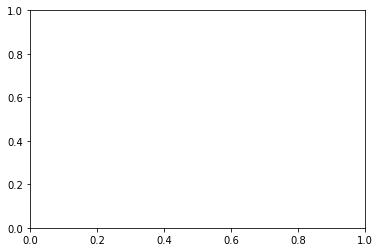

In [ ]:
import matplotlib.pyplot as plt
plt.plot(distances, exact_energies, label = "Exact Energy")
plt.plot(distances, vqe_energies, label = "VQE Energy")
plt.xlabel("Atomic distance (Angstrom")
plt.ylabel("Energy")
plt.legend()
plt.show()